In [70]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


np.random.seed(42)

n = 100

x = np.linspace(-1,1,n)
y = 1/(1+25*x**2) 
y = y.reshape(n,1) 
y_noise = y + np.random.normal(0,0.1)


def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

def R2(y, y_pred):
    return 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

def polynomial_features(x, p, intercept=False):
    n = len(x)
    k = 0
    if intercept:
        X = np.zeros((n, p + 1))
        X[:, 0] = 1
        k += 1
    else:
        X = np.zeros((n, p))

    for i in range(1, p +1):
        X[:, i + k-1] = x**i 
    return X



## Part C : Writing once own gradient descent code
replace now the analytical expressions for the optimal parameters θ with your own gradient descent
code. In this exercise we focus only on the simplest gradient descent approach with a fixed learning
rate (see the exercises from week 37 and the lecture notes from week 36).
Study and compare your results from parts a) and b) with your gradient descent approch. Discuss
in particular the role of the learning rate.

Expression for the Gradient for OLS
$$
\nabla_{\theta} C(\theta) = \frac{2}{n}\begin{bmatrix} \sum_{i=1}^{100} \left(\theta_0+\theta_1x_i-y_i\right) \\
\sum_{i=1}^{100}\left( x_i (\theta_0+\theta_1x_i)-y_ix_i\right) \\
\end{bmatrix} = \frac{2}{n}X^T(X\theta - \mathbf{y}),
$$

In [71]:
def Gradient_OLS(X, y,theta, eta=0.01, n=100):
    return (2.0/n)*X.T @ (X @ theta-y)


Gradient descent code for Ridge, are we going to use this in this project?
$$
\nabla_\theta C_{\text{ridge}}(\theta)  = \frac{2}{n}\begin{bmatrix} \sum_{i=1}^{100} \left(\theta_0+\theta_1x_i-y_i\right) \\
\sum_{i=1}^{100}\left( x_i (\theta_0+\theta_1x_i)-y_ix_i\right) \\
\end{bmatrix} + 2\lambda\begin{bmatrix} \theta_0 \\ \theta_1\end{bmatrix} = 2 (\frac{1}{n}X^T(X\theta - \mathbf{y})+\lambda \theta).
$$

In [72]:
def Gradient_Ridge(X, y, theta, eta=0.01, lambda_param=1.0,n=100):

    return (2.0/n)*X.T @ (X @ theta-y) + 2*lambda_param*theta 



Here the Gradient is approximated through a fixed learning rate $\eta$, where 

$$
\theta^{n+1} = \theta^n - \eta * gradient(X,y,\theta^n)
$$

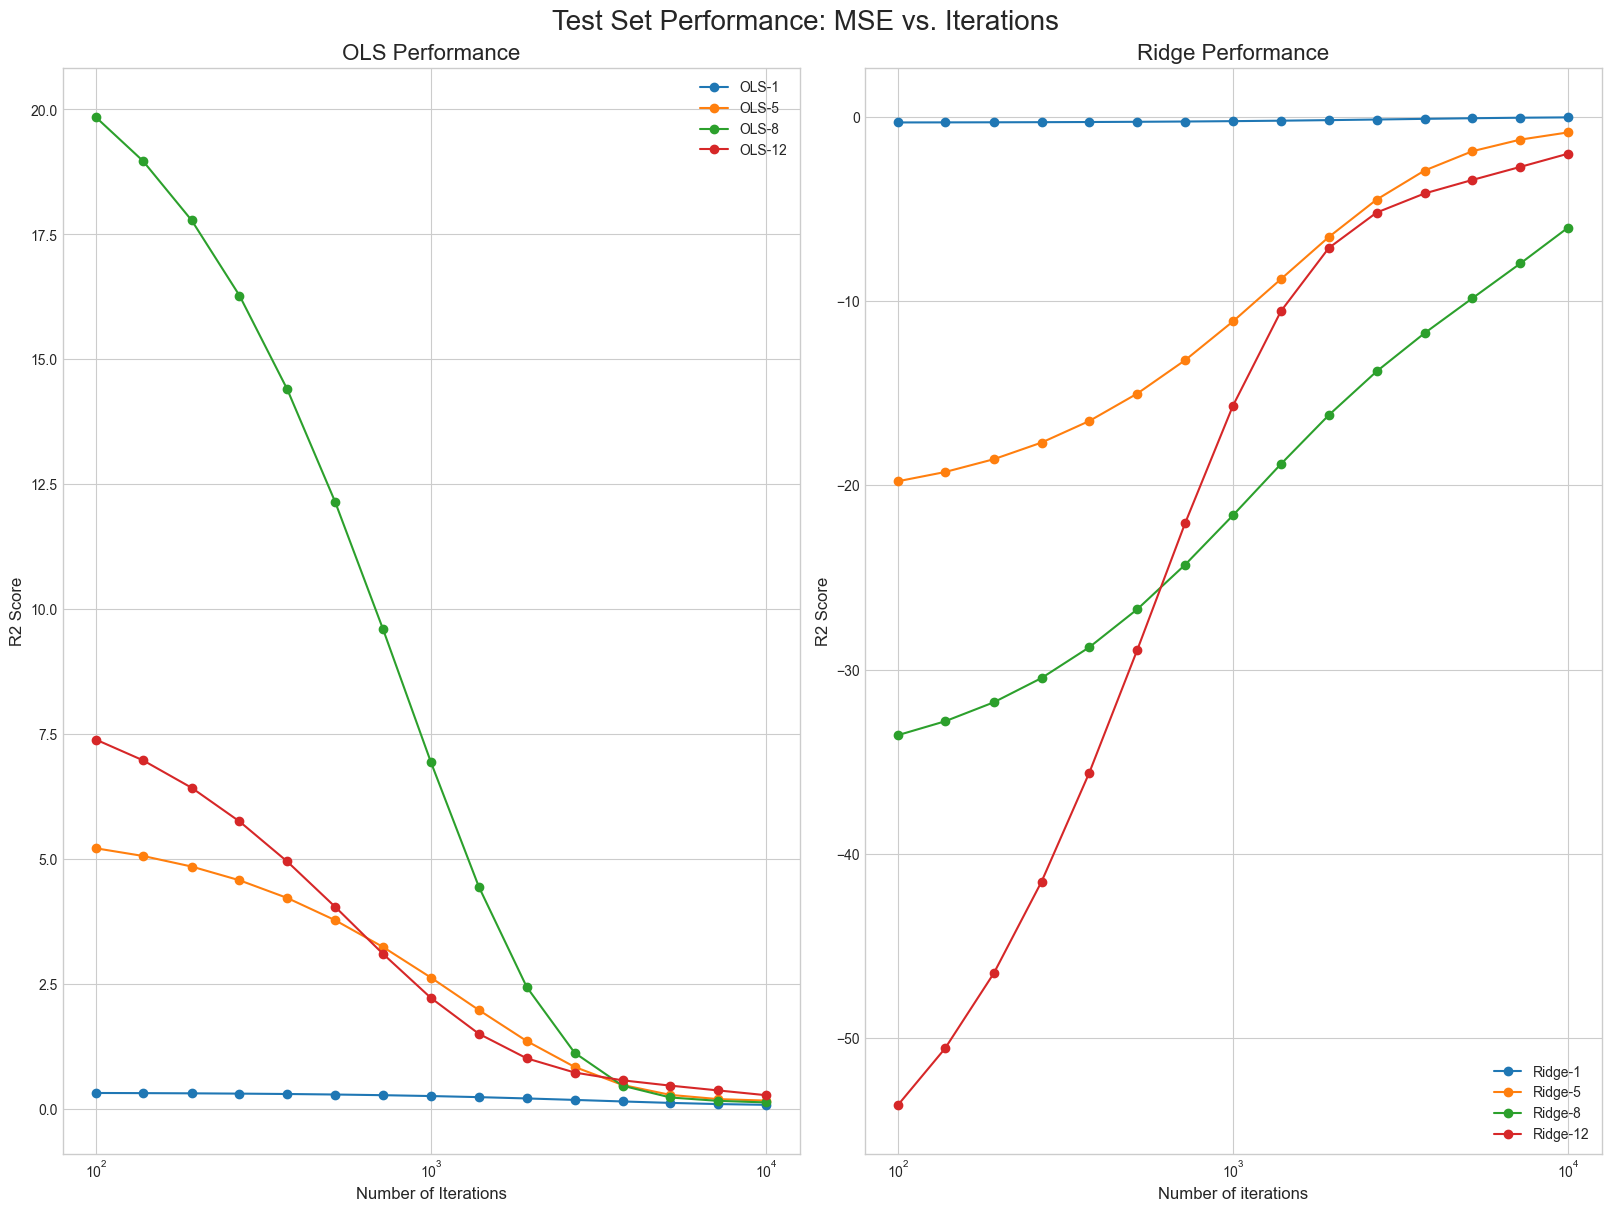

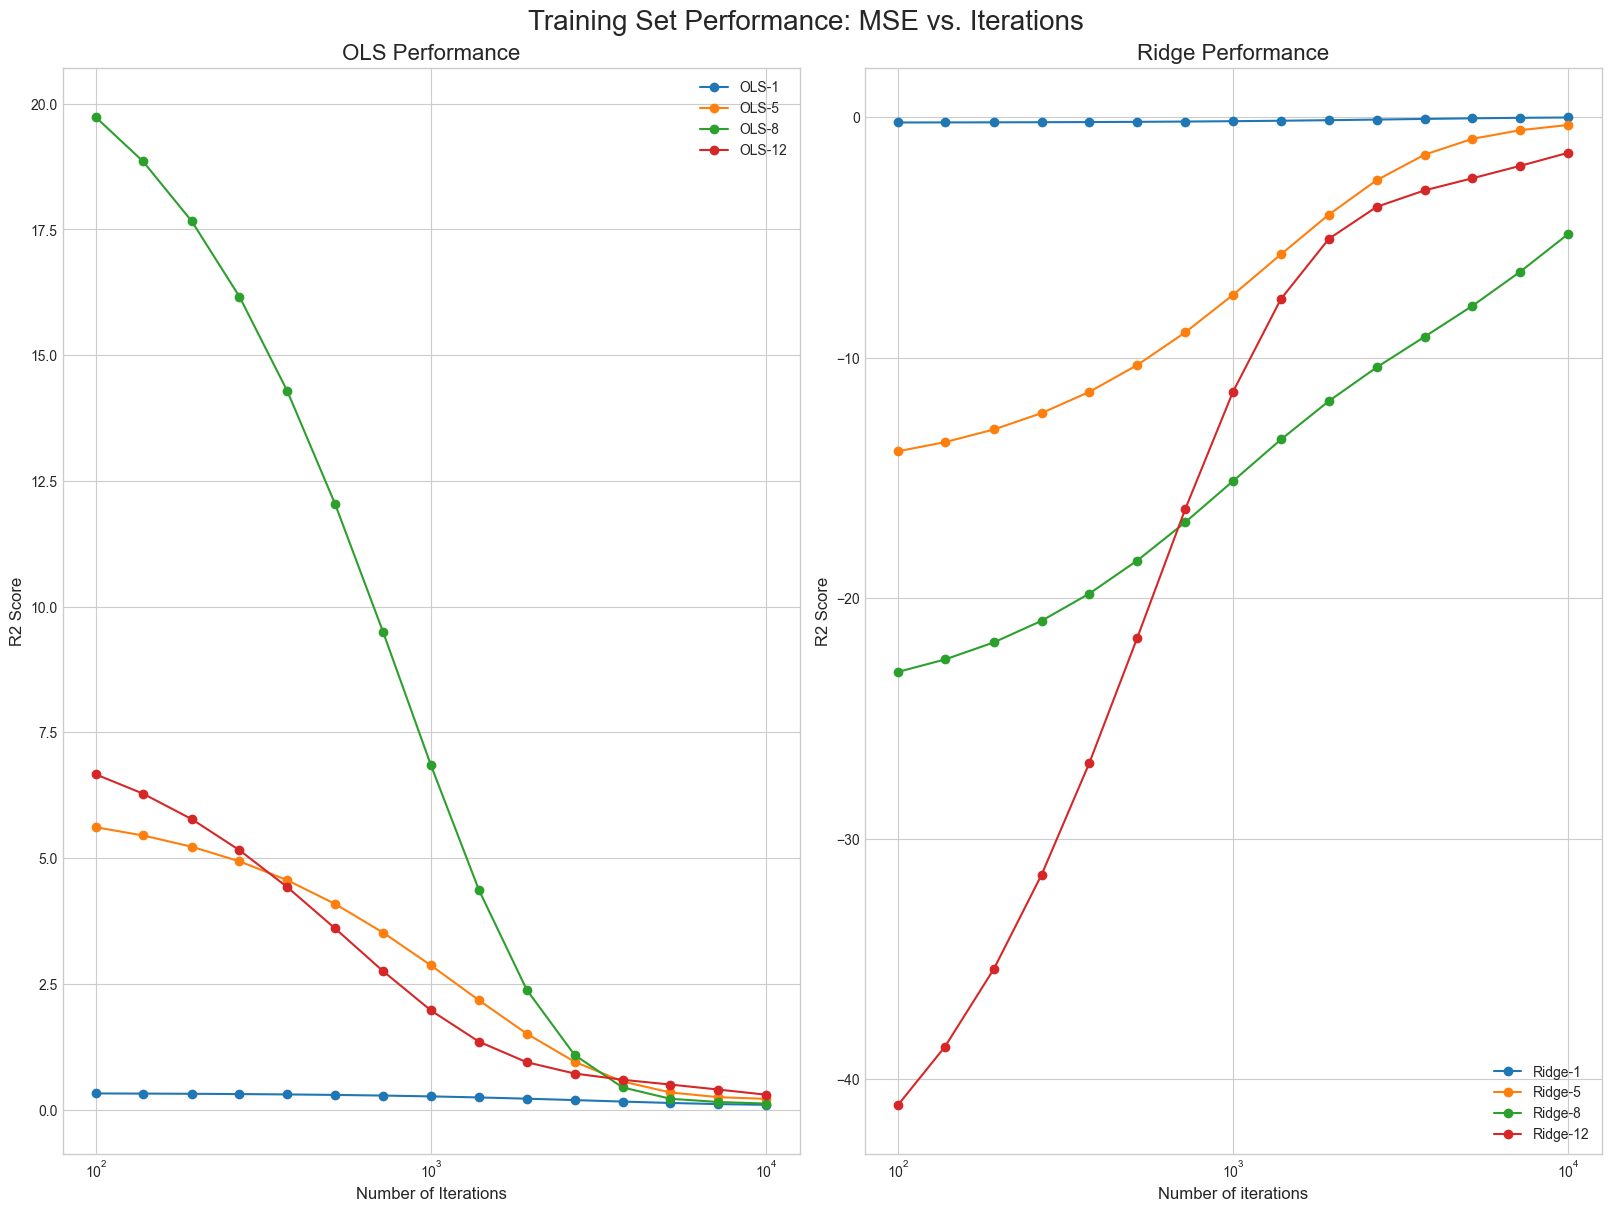

In [73]:
# Gradient descent parameters, learning rate eta first
eta = 0.0001
lam = 0.001
# Then number of iterations
num_iters = 10000
degrees = [1,5,8,12]
np.random.seed(42)
iter_saves = np.unique(np.logspace(2, np.log10(num_iters - 1), 15).astype(int))

# Initialize weights for gradient descent


# Gradient descent loop

plot_predict = {"OLS" : { },
                "Ridge" : {}}
plot_train = {"OLS":{ },
              "Ridge": { }}
theta_store = {"OLS": {}, "Ridge": {}}

y_centered = y - y.mean() 


for degree in degrees:
    X = polynomial_features(x, degree)
    scalar = StandardScaler()
    X = scalar.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)


    keys = ["OLS", "Ridge"]
    for key in keys: 
        plot_predict[key][degree] = { "mse":[], "r2" : []}
        plot_train[key][degree] = { "mse":[], "r2" : []}  
        theta_store[key][degree] = []
        theta = np.random.randn(X_train.shape[1],1)

        for t in range(num_iters):
            # Compute gradients for OSL and Ridge
            if key == "OLS":
                grad_OLS = Gradient_OLS(X_train, y_train, eta=eta,theta=theta)
                theta -= eta * grad_OLS
            elif key =="Ridge":
                grad_Ridge= Gradient_Ridge(X_train, y_train, eta=eta, lambda_param=lam,theta=theta)
                theta -= eta * grad_Ridge
            if t in iter_saves:
                y_pred = X_test @ theta
                y_train_pred= X_train @ theta
                plot_predict[key][degree]["mse"].append(MSE(y_test, y_pred))
                plot_predict[key][degree]["r2"].append(R2(y_test, y_pred))
                theta_store[key][degree].append(theta)
                plot_train[key][degree]["mse"].append(MSE(y_train, y_train_pred))
                plot_train[key][degree]["r2"].append(R2(y_train, y_train_pred))

def plot_mse_vs_iterations(results_dict, title):
    """Helper function to plot MSE vs. iterations."""
    fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(16, 12), constrained_layout=True)
    fig.suptitle(title, fontsize=20)
    for degree in degrees:
        ax1.plot(iter_saves, results_dict["OLS"][degree]["mse"], 'o-', label=f"OLS-{degree}")

        ax2.plot(iter_saves, results_dict["Ridge"][degree]["r2"], 'o-', label=f"Ridge-{degree}")
    
    ax1.set_title("OLS Performance", fontsize=16)
    ax1.set_xlabel("Number of Iterations", fontsize=12)
    ax1.set_xscale('log')
    ax1.set_ylabel("R2 Score", fontsize=12)
    ax1.legend(fontsize=10)

    ax2.set_title("Ridge Performance", fontsize=16)
    ax2.set_xlabel("Number of Iterations", fontsize=12)
    ax2.set_xscale('log')
    ax2.set_ylabel("R2 Score", fontsize=12)
    ax2.legend(fontsize=10)

    plt.xlabel("Number of iterations")
    plt.show()

plot_mse_vs_iterations(plot_predict, "Test Set Performance: MSE vs. Iterations")
plot_mse_vs_iterations(plot_train, "Training Set Performance: MSE vs. Iterations")


x.shape

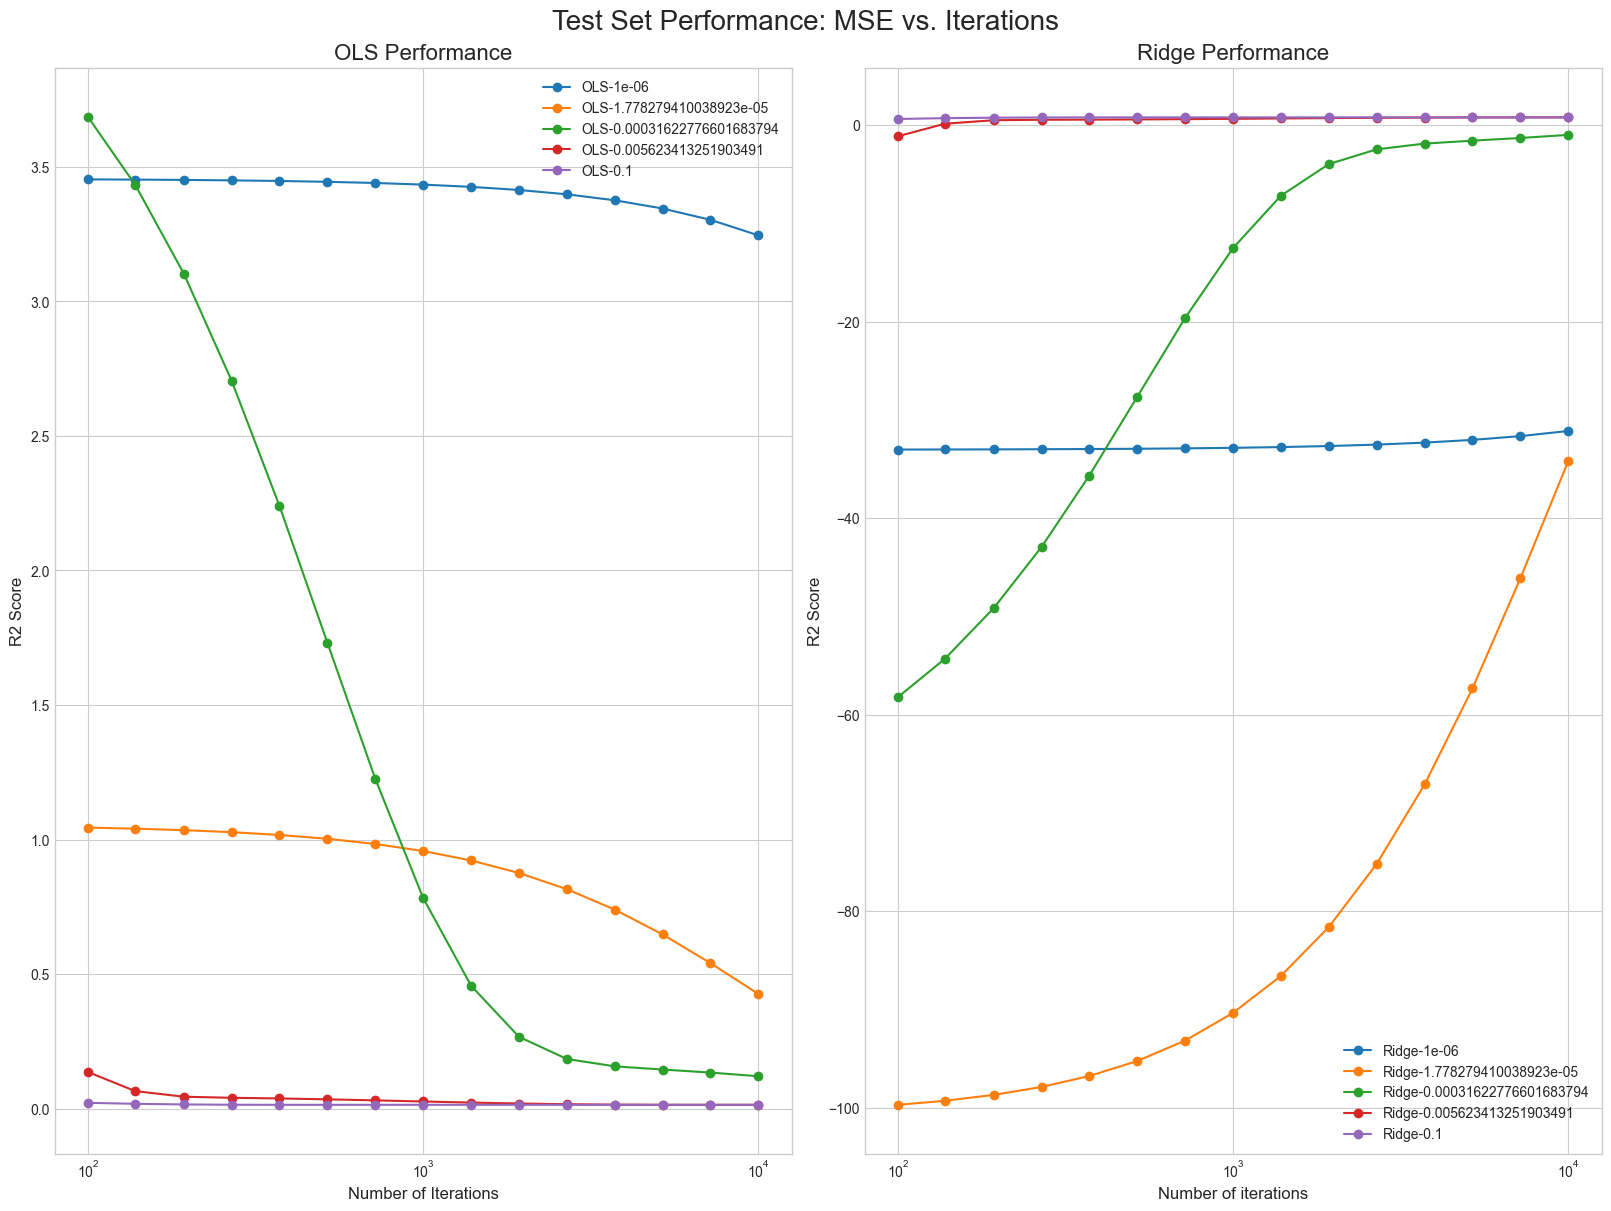

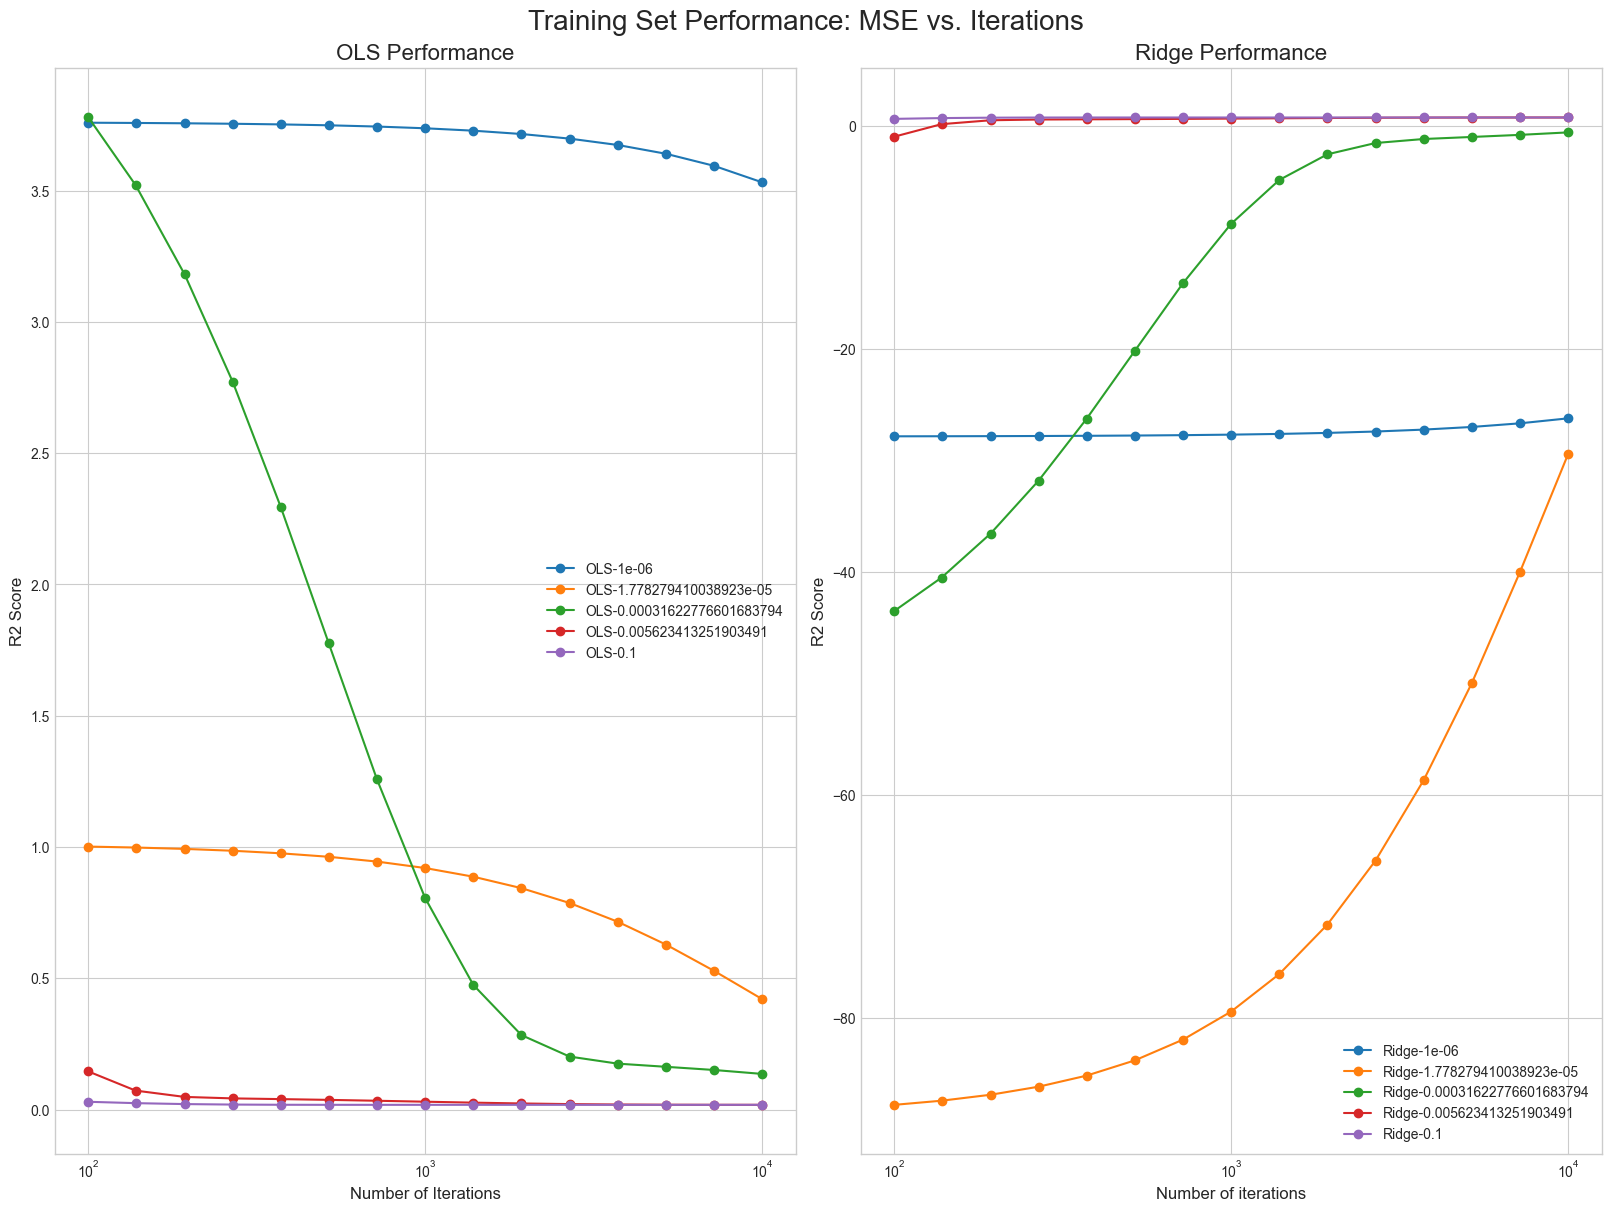

In [77]:
# Gradient descent parameters, learning rate eta first
etas  = np.unique(np.logspace(-6, -1, 5))
lam = 0.001
# Then number of iterations
num_iters = 10000
degrees = [1,5,8,12]
np.random.seed(42)
iter_saves = np.unique(np.logspace(2, np.log10(num_iters - 1), 15).astype(int))

# Initialize weights for gradient descent


# Gradient descent loop

plot_predict = {"OLS" : { },
                "Ridge" : {}}
plot_train = {"OLS":{ },
              "Ridge": { }}
theta_store = {"OLS": {}, "Ridge": {}}

y_centered = y - y.mean() 

degree = 4

for eta in etas:
    X = polynomial_features(x, degree)
    scalar = StandardScaler()
    X = scalar.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)


    keys = ["OLS", "Ridge"]
    for key in keys: 
        plot_predict[key][eta] = { "mse":[], "r2" : []}
        plot_train[key][eta] = { "mse":[], "r2" : []}  
        theta_store[key][eta] = []
        theta = np.random.randn(X_train.shape[1],1)

        for t in range(num_iters):
            # Compute gradients for OSL and Ridge
            if key == "OLS":
                grad_OLS = Gradient_OLS(X_train, y_train, eta=eta,theta=theta)
                theta -= eta * grad_OLS
            elif key =="Ridge":
                grad_Ridge= Gradient_Ridge(X_train, y_train, eta=eta, lambda_param=lam,theta=theta)
                theta -= eta * grad_Ridge
            if t in iter_saves:
                y_pred = X_test @ theta
                y_train_pred= X_train @ theta
                plot_predict[key][eta]["mse"].append(MSE(y_test, y_pred))
                plot_predict[key][eta]["r2"].append(R2(y_test, y_pred))
                theta_store[key][eta].append(theta)
                plot_train[key][eta]["mse"].append(MSE(y_train, y_train_pred))
                plot_train[key][eta]["r2"].append(R2(y_train, y_train_pred))

def plot_mse_vs_iterations(results_dict, title):
    """Helper function to plot MSE vs. iterations."""
    fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(16, 12), constrained_layout=True)
    fig.suptitle(title, fontsize=20)
    for eta in etas:
        ax1.plot(iter_saves, results_dict["OLS"][eta]["mse"], 'o-', label=f"OLS-{eta}")

        ax2.plot(iter_saves, results_dict["Ridge"][eta]["r2"], 'o-', label=f"Ridge-{eta}")
    
    ax1.set_title("OLS Performance", fontsize=16)
    ax1.set_xlabel("Number of Iterations", fontsize=12)
    ax1.set_xscale('log')
    ax1.set_ylabel("R2 Score", fontsize=12)
    ax1.legend(fontsize=10)

    ax2.set_title("Ridge Performance", fontsize=16)
    ax2.set_xlabel("Number of Iterations", fontsize=12)
    ax2.set_xscale('log')
    ax2.set_ylabel("R2 Score", fontsize=12)
    ax2.legend(fontsize=10)

    plt.xlabel("Number of iterations")
    plt.show()

plot_mse_vs_iterations(plot_predict, "Test Set Performance: MSE vs. Iterations")
plot_mse_vs_iterations(plot_train, "Training Set Performance: MSE vs. Iterations")


Degree 12:
Which is very uninteresting, you see that a too high learning rate will blow up, and create overflows in the calcualtions if the training rate is 1.
When we reduce the training rate to -6 to -1 we get a more interesting graph that describes how the training rate is low will make the graph take a longer time bedfore it reaches the model, while high training rate will collaps to a solution much earlier. So a high trainingrate, where it doesnt bounce of the walls is best.

Degree 4: 
A traing rate of 1 will work, as it doenst blow up as quickly as with the degree 12 polynomial

# NB I AM NOT USING R2 in these graphs correctly